# Programming Assignment 1 - Understanding upvotes on top reddit posts

After completing this project, you will be able to do the following:

- Collect and save reddit data using the reddit API (through the ```praw``` library)
- Be able to conduct descriptive analyses, via manipulation of data stored in a pandas dataframe, and via the creation and exploration of graphs, of the number of upvotes of reddit comments
- Be able to conduct a linear regression to help understand the factors associated with a top post having many upvotes on reddit
- **574 Only**: Be able to implement additional feature sets and/or a new model and describe why those decisions were made and what their effects were on performance

# Resources you can use to complete this assignment (a COMPLETE list)

**NOTE: You ARE allowed to use Google to find things that fit this list (i.e. it is often easy to google something like "plotly draw line graph" to find the right part of the plotly documentation).**

- Anything linked to in this article
- Anything linked to from the course web page
- Any materials from another online course taught at a university (**if you use this, you MUST provide a link to the exact document used**)
- Anything posted by Kenny, Navid, or Yincheng on Piazza

# Setup

- For this assignment, you will need to install the PRAW library for scraping reddit data.

# Grading

There are three parts to the grading:

1. **Written Report (60 points)**: You will submit a PDF report that provides answers to questions here, and that contains plots we request.  These same questions are also posted in the assignment PDF, for convenience. **Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**.

2. **Saved file from Part 1.3 (10 points)**: See below for details. 

3. **Coding spot checks (30 points)** - We will select 6 problems to spot check. This means that we will check to make sure that your code is written in a reasonable way and that it obtains the desired results when we run your code. For example, your code should not be written in a way that makes it exceedingly slow, e.g. by using for loops where a vectorized approach would be applicable. We will *not* tell you which problems we are spot checking.


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report, answering all questions asked here (and copied in the assignment PDF)
- Your saved file from Part 1.3 below

In [112]:
pip install praw

In [113]:
# This is a comment in the code. All comments in python are preceeded by a pound sign
# Comments can be plain English, because the computer ignores them when running the code.

# This should be all the imports you need for this project.

# The line of code below this comment imports code written by other people in the form of the 
# praw library
import praw
from tqdm import tqdm
import numpy as np
import pandas as pd
import plotly.express as px


# Part 1: Data collection

## Step 1: Creating a reddit account

If you don't have one already, the first thing you'll need to do is go to [reddit](http://www.reddit.com/) and create a reddit account.

## Step 2: Creating a reddit app

Now, we're going to create a reddit app. Make sure you're signed in to your reddit account, and then go to the [app page](https://ssl.reddit.com/prefs/apps/).  From here, click on the "create an app" button. <b>Make sure that you've selected the "script" option in the checkbox</b>, and then fill in a name and description. For the two URL fields, it doesn't really matter what you put. Your input should look something like mine.

<img width="1000px" src="/content/reddit_tut_0.png" style="max-width:95%;border:3px solid black;"></img>
    
Cool! Now hit "create app" button.

## Step 3: Scraping some reddit data

### 3a - setting up your API credentials
We're now going to pull down some real, live reddit posts and take a look at them! To do so, we're going to need some information from our app.  Reddit uses this information to keep track of who is accessing their data, and in what ways they're accessing it.  In other words, reddit wants to make sure it knows who might be doing bad things with their data or to their platform, so they can shut those apps down. We'll return to that point in a bit.  But, for now, you'll need to edit the code below to enter in your ```client_id```, your ```client_secret```, and your ```username```  in order for you to be able to collect data.  ***Note - PLEASE TRY TO REMEMBER TO REMOVE YOUR SECRET INFORMATION BEFORE SUBMITTING THE ASSIGNMENT***. You can find the first two on the app creation page, where the red boxes are in the image below:

<img width="1000px" src="/content/reddit_tut_1.png" style="max-width:95%;border:3px solid black;"></img>

Enter your information between the appropriate quotation marks in the (python) code below, replacing the phrase ```ENTER_YOUR_XXX_HERE```.

 ***Make sure to push ```SHIFT+ENTER``` after you've changed the code!*** 

In [114]:
your_client_id = '5vFbWt9pZW9QNYLYCYxk5w'
your_client_secret = 'SDu2L0iRNOz3S4rRSTvFA1Qr1FHWrA'
your_username = "Phoenix574"
your_user_agent="mlcse574 by u/Phoenix574"
your_password="Capital100$"

### 3b - Selecting subreddits

Ok, we're almost all set up to scrape! to do so, we're going to use a python library called [praw](https://praw.readthedocs.io/).  Praw is a relatively powerful tool, allowing you to do a bunch of cool things with the reddit API.  For this assignment, you're just going to do the basics:

Specifically, **<span style="color: red;">create a variable called ```subreddits``` in the code box below. The variable should point to a ```list``` data structure that has the names of 3 subreddits you want to pull data from.</span>**

In [115]:

subreddits = ['robotics','memes','deeplearning']

### 3c - Setting up our authentication mechanism for our application

The last step before we start crawling is to set ourselves up to make authenticated calls to the reddit API. **<span style="color: red;">Use the PRAW library to create an instance of the class ```praw.Reddit``` that you can use to scrape the reddit API.</span>**


In [116]:
reddit=praw.Reddit(client_id=your_client_id,
                   client_secret=your_client_secret,
                   user_agent=your_user_agent,
                   check_for_async=False)

In [117]:
# Code for 3c should go here
print(reddit.user.me())       #to verify the authentication

None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The `None` return value is deprecated, and will raise a `ReadOnlyException` beginning with PRAW 8. See documentation for forward compatibility options.
  


### 3d - Finally, some scraping!

OK! Now we can finally pull some data down from the reddit API!

<span style="color: red;">Use the ```praw``` library to pull down the **top 1000 posts of all time from EACH of the 3 subreddits you selected.** Note: You may not get all 1000, due to oddities with the reddit API. However, your code should specify that it *wants* up to 1000 posts.</span>

In [118]:
# Code for 3d should go here
list_of_posts=[]   #list of posts objects, where each objet has the top 1000 posts of each subreddit mentioned in the list
for i in subreddits:
  post=reddit.subreddit(i).hot(limit=1000)
  list_of_posts.append(post)

## Answering some questions about your data and the API

### 1.1 Understanding APIs
***Note, Part 1 questions can be answered by carefully reading the [documentation of the PRAW library carefully](https://praw.readthedocs.io/en/v3.6.2/pages/getting_started.html) and/or the [reddit API documentation](https://github.com/reddit-archive/reddit/wiki/API#rules).***

- **1.1.1** How many API calls were required to collect the submissions?
- **1.1.2** Why did we set the submission limit at 1000?
- **1.1.3** How long, in minutes, would it take you to collect 1000 posts from 25 different subreddits? What about from 500 different subreddits? *Hint: You'll have to consider how many API requests you are allowed to make in a given time period.*

### 1.2 Thinking about your sample

You collected (approximately) the top 1000 submissions from 3 different subreddits. 

- **1.2.1** Do you think these posts are representative of **all** the posts on that subreddit? (Yes or no, only) 
- **1.2.2** Why or why not? That is, if you think so, why do you think there's not much sampling bias here? If not, what do you think might be different about these top posts than other posts?



## Saving out your data

Finally, we're going to save your data out and submit it. For this part, [this section of the API documentation may be useful](https://praw.readthedocs.io/en/latest/getting_started/quick_start.html#determine-available-attributes-of-an-object). Similarly, note that saving CSVs is sometimes easiest by first converting your data into a ```pandas``` dataframe, and then just calling ```.to_csv()```.

<span style="color: red;">You will save the data you have collected out to a CSV file. This CSV file should be called ```part1_data.csv```. The file should contain a column for each of the fields listed in the ```fields_to_capture``` list below. Additionally, you should save out the **author's name** (hint, the author attribute of the ```praw.Submission``` data structure is a ```praw.Redditor``` object. You will need to access that object to get the author name. Call this column ```author_name`` in your CSV file. </span>

**Note: Some posts will not have data for some of these columns. That is fine! You can make these fields blank in the CSV, then.**

In [119]:
# Don't change this!
fields_to_capture = [ 'created_utc', 
                     'is_crosspostable', 'is_self', 'is_video', 'locked', 'media_only', 'over_18',
                     'subreddit_id', 'subreddit_name_prefixed', 'subreddit_subscribers', 
                     'title', 'permalink', 
                     'total_awards_received', 'downs','gilded','num_comments', 'num_crossposts', 'num_reports', 
                     'ups','author_name']

In [120]:

# Write the code here to save out the data
# from prawcore.exceptions import Forbidden
p=list()
for i in list_of_posts:
  for j in i:
    p.append([j.created_utc,j.is_crosspostable,j.is_self,j.is_video,j.locked,j.media_only,j.over_18,j.subreddit_id,j.subreddit_name_prefixed,j.subreddit_subscribers,j.title,j.permalink,j.total_awards_received,j.downs,j.gilded,j.num_comments,j.num_crossposts,j.num_reports,j.ups,j.author])
    # print(reddit.submission(j).author)
data=pd.DataFrame(p,columns=fields_to_capture)
data.to_csv('/content/part1_data.csv')    # author's name not there

### 1.3 Grading for saving data

Submit your saved data from the reddit API in a file named ```part1_data.csv```. For grading for Part 1.3, we will check that:
- We can read in the saved file using ```pandas.read_csv()```
- The resulting file has data from three subreddits, approximately 1000 from each (give or take what the API decides to give you, which is out of your control).
- The resulting file has all the necessary columns, i.e. those listed in ```fields_to_capture```.


# Part 2 - Analyzing an existing dataset

For this section of the assignment, the entire class will use ```part2_data.csv```.  We will ask you to analyze these data in a variety of ways. Parts of this will be submitted in your written report, and other parts will be evaluated automatically.

**Part 2 data consists of the top 1000 (ish) posts from 24 different subreddits**.

In [121]:
part2_data = pd.read_csv("/content/part2_data.csv")
part2_data.head()

,created_utc,is_crosspostable,is_self,is_video,locked,media_only,over_18,score,subreddit_id,subreddit_name_prefixed,subreddit_subscribers,title,permalink,total_awards_received,downs,gilded,num_comments,num_crossposts,num_reports,ups,author_name
0,1.582163e+09,False,True,False,False,False,False,146606,t5_2qh72,r/Jokes,22101145,Sad News: The founder of /r/jokes has passed away,/r/Jokes/comments/f6lii3/sad_news_the_founder_...,200,0,5,1699,9,NaN,146606,error521
1,1.511295e+09,False,True,False,False,False,False,137607,t5_2qh72,r/Jokes,22101145,Calm down about the Net Neutrality thing...,/r/Jokes/comments/7ekt23/calm_down_about_the_n...,15,0,2,1614,2,NaN,137607,Victorinox2
2,1.499278e+09,False,True,False,False,False,False,108795,t5_2qh72,r/Jokes,22101145,V,/r/Jokes/comments/6lfqep/v/,29,0,7,1360,1,NaN,108795,MadGo
3,1.565449e+09,False,True,False,False,False,True,105444,t5_2qh72,r/Jokes,22101145,If your surprised that Jeffrey Epstein commite...,/r/Jokes/comments/coj45m/if_your_surprised_tha...,48,0,11,2418,7,NaN,105444,williseeyoutonight
4,1.539007e+09,False,True,False,False,False,False,100954,t5_2qh72,r/Jokes,22101145,A new Navy recruit has his first day on the su...,/r/Jokes/comments/9mf1cz/a_new_navy_recruit_ha...,25,0,9,772,6,NaN,100954,Ckarini


## Part 2.1 - Quick Descriptive Analyses

Answers to each of the questions below should be provided in your written report. Additionally, we expect code to be written below that shows how you obtained answers to each of these questions. We will spot-check several of these. **Note, each of these can be answered using *only pandas*. 


### Univariate descriptive analyses
- **2.1.1** What are the names (```subreddit_name_prefixed```) of the 25 different subreddits that are in ```part2_data.csv```?
- **2.1.2** How many reddit authors (```author_name```) have a post in more than one unique subreddit in ```part2_data.csv``` (e.g. they have a top post in both ```r/news``` and ```r/hockey```)?
- **2.1.3** What is the mean number of upvotes (```ups```) for posts in ```r/Jokes```?
- **2.1.4** What is the variance of the number of upvotes in ```r/news```?
- **2.1.5** What is the standard deviation of the number of upvotes received across the entire dataset? 
- **2.1.6** (No code for this) Mathematically, what is the relationship between the standard deviation of the number of upvotes and the variance of upvotes?
- **2.1.7** Which subreddit had the third highest median number of upvotes?

### Conditional probability
- **2.1.8** What is the conditional probability of an author having a top post in ```r/news```, given that they have a top post in ```r/worldnews```?


In [122]:
# Put your code for 2.1.1 here
split_data = part2_data["subreddit_name_prefixed"].str.split("/")
list1 = split_data.to_list()
# print(list1)
l=[i[1] for i in list1]
s=list(set(l))
print(s)

['technology', 'Jokes', 'sports', 'gaming', 'aww', 'memes', 'hockey', 'WritingPrompts', 'news', 'funny', 'worldnews', 'travel', 'learnprogramming', 'todayilearned', 'conspiracy', 'mildlyinteresting', 'cats', 'PoliticalHumor', 'announcements', 'books', 'food', 'gadgets', 'science', 'Showerthoughts']


In [123]:
# Put your code for 2.1.2 here
l1 = []
for i in part2_data["author_name"].unique():
    temp = part2_data[part2_data.author_name==i]
    if len(temp.subreddit_name_prefixed.unique())>1:
        l1.append(i)
print(len(l1))

569


In [124]:
# Put your code for 2.1.3 here
jokes=part2_data.loc[part2_data['subreddit_name_prefixed'].str.contains('Jokes',case=False)]
ups=jokes["ups"].mean()
print(ups)

41057.7813440321


In [125]:
# Put your code for 2.1.4 here
news=part2_data.loc[part2_data['subreddit_name_prefixed'].str.contains('r/news',case=True)]
variance=news["ups"].var()
print(variance)

600707867.6203133


In [126]:
# Put your code for 2.1.5 here
s=pd.DataFrame({"standardDeviation":part2_data["ups"]})
sd=s.std()
print(sd)

standardDeviation    43102.484474
dtype: float64


In [127]:
# Put your code for 2.1.6 here


In [128]:
# Put your code for 2.1.7 here
d=dict()
part2_data1=part2_data.reset_index()
for i,row in part2_data1.iterrows():   #iterating through rows in the dataframe
  if(row["subreddit_name_prefixed"] not in d):
    d[row["subreddit_name_prefixed"]]=[row["ups"]] #creating dictionary with keys as subreddits and its values as list of their upvotes 
  else:
    d[row["subreddit_name_prefixed"]].append(row["ups"])
d1=dict()
for key in d:
  d1[key]=np.median(d[key])  #creating dictionary with keys as subreddits and values as their median of upvotes
d2=sorted(d1.items(),key=lambda x:x[1],reverse=True)    #sorting the dictionary in descending order of values
print(d2[2][0])   #printing name of subreddit with third highest median upvotes

r/aww


In [129]:
#Put your code for 2.1.8 here
n,w=list(),list()
for i,row in part2_data1.iterrows():
  if(row["subreddit_name_prefixed"] == "r/news"):
    n.append(row["author_name"])
  elif(row["subreddit_name_prefixed"]=="r/worldnews"):
    w.append(row["author_name"])
intersection=set.intersection(set(n),set(w))
# print(len(w))
print(len(intersection)/len(set(w)))# changing len(w) to len(set(w)) because w included duplicate values of authors

0.10229007633587786


## Part 2.2 - Plotting and the like
Where we have asked you to create a plot below, make sure to provide the resulting plot in your written report.  

**You are free to use whatever plotting software you wish! Although I personally think [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/python), or [altair](https://altair-viz.github.io/) will make these the easiest, the lecture notes also have examples using matplotlib.**


### Part 2.1 - Histograms

Plot a histogram for the distribution of upvotes for each subreddit separately (*hint: you will want to use "faceting" to make this easy on yourself*). **All plot titles and axis labels should be legible in the PDF you submit**.

- **2.2.1** - Submit your histogram image in your assignment
- **2.2.2** - Based on your histogram, which subreddit would you say is the *least* popular? (Note, there is more than one reasonable answer here. We are looking mostly for how you justify your response using the histogram)


In [130]:
# Code for 2.2.1 here
import plotly.express as px
fig= px.histogram(part2_data[part2_data.subreddit_name_prefixed.isin(["r/news","r/worldnews","r/science","r/new", "r/technology", 'r/worldnews', 'r/books', 
              'r/hockey', 'r/sports', 'r/gadgets', 'r/gaming', 'r/mildlyinteresting', 'r/travel', 'r/learnprogramming', 'r/conspiracy',
              'r/announcements', 'r/memes', 'r/aww', 'r/WritingPrompts', 'r/funny', 'r/todayilearned', 'r/science', 'r/Showerthoughts',
               'r/cats', 'r/food', 'r/PoliticalHumor', 'r/Jokes'])], 
              x="ups", 
              facet_col='subreddit_name_prefixed', facet_col_wrap=12, nbins=20,
             height=800,width=1400, title="Histogram" )
#fig.update_layout(bargap=0.2)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.update_xaxes(matches=None)
fig.show()

### Ploting and using the empirical CDF

The *[empirical cumulative distribution function (eCDF)](https://en.wikipedia.org/wiki/Empirical_distribution_function)* is an empirical estimator for the CDF of a random variable. Below we have plotted for you (using ```plotly```) the eCDFs of the distribution of upvotes for three different subreddits. Using the plots below, answer the following questions:

**Note, you can use your mouse to scroll over the information in the plot, that will make answering these questions much easier!**

- **2.2.3** - **Approximately (within 1-2 percentage points)** what percent of top posts for each of the three subreddits plotted below have less than 100,000 upvotes? (Give answers for each subreddit)
- **2.2.4** - **Approximately (within 1-2 percentage points)** what is the probability that a post on each of the three subreddits plotted below has more than 70,000 upvotes? (Give answers for each subreddit)

In [131]:
import plotly.express as px

fig = px.ecdf(part2_data[part2_data.subreddit_name_prefixed.isin(["r/news","r/worldnews","r/science"])], 
              x="ups",
              facet_col='subreddit_name_prefixed',
             height=400,width=800)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None)
fig.show()

### Temporal Trends 

To answer this question we are going to plot the average upvotes and number of top posts of a subreddit in our dataset per each year.

First, add a ```year``` column to the data, that represents the year in which the post was sent. You likely want to use the [pandas documentation on dates and times](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) for this.

In [132]:
# Add the year column
from datetime import datetime

part2_data['year'] = part2_data.created_utc.apply(lambda x : datetime.fromtimestamp(x).year)
part2_data['year']

0        2020
1        2017
2        2017
3        2019
4        2018
         ... 
22963    2021
22964    2021
22965    2019
22966    2020
22967    2015
Name: year, Length: 22968, dtype: int64

As a check on this column, answer the following question:
- **2.2.5** - How many posts in the dataset were sent in 2010?

In [133]:
# Code for 2.2.5 here
# for(i in part2_data['year'] == 2010):
temp1 = part2_data.loc[part2_data['year'] == 2010]
print(temp1['num_crossposts'].value_counts().values)

[35]


Now, we're going to plot the **yearly trend** of average upvotes for each subreddit.

**Hint: We will assume that the average upvotes for a given subreddit in a given year is zero when there are no top posts for that subreddit in that year.** To accurately reflect this, you will have to make sure to account for this case.


In [134]:
# Hint: you do not have to use this function, but it may be useful for you
from itertools import product

# create the zeros dataframe
merge_zeros = pd.DataFrame(product(part2_data.year.unique(), 
                     part2_data.subreddit_name_prefixed.unique()),
                     columns =['year','subreddit_name_prefixed']
                )
merge_zeros['ups_with_zeros'] = 0

# merge with the non-zero data ... you write this code ...
merge_data = part2_data.groupby(['year','subreddit_name_prefixed'])['ups'].mean()
merge_data=merge_data.reset_index()
merged_inner = (merge_zeros.merge(merge_data, on=['year','subreddit_name_prefixed'], how='left').fillna(0)).drop(columns='ups_with_zeros')
merged_inner.year =  merged_inner.year.astype(str)
merged_inner = merged_inner.sort_values(by='year')
fig= px.bar(merged_inner[merged_inner.subreddit_name_prefixed.isin(["r/news","r/worldnews","r/science","r/new", "r/technology", 'r/worldnews', 'r/books', 
              'r/hockey', 'r/sports', 'r/gadgets', 'r/gaming', 'r/mildlyinteresting', 'r/travel', 'r/learnprogramming', 'r/conspiracy',
              'r/announcements', 'r/memes', 'r/aww', 'r/WritingPrompts', 'r/funny', 'r/todayilearned', 'r/science', 'r/Showerthoughts',
               'r/cats', 'r/food', 'r/PoliticalHumor', 'r/Jokes'])], 
             x='year', y= 'ups', height=800,width=1200,facet_col='subreddit_name_prefixed', facet_col_wrap=8)
              
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None)
fig.show()

As a check, please do the following:

- **2.2.6** - In your report, provide a table (a screenshot of a pandas dataframe is fine) that shows the average number of upvotes for r/memes each year from 2015 to 2020. The table should be sorted by year (i.e. 2015, then 2016, etc.). Note again, if a year does not have data, there should be zeros in this table!

In [135]:
# Code for 2.2.6 here
up_memes = merged_inner[merged_inner.subreddit_name_prefixed.isin(["r/memes"])& (merged_inner.year>='2015') & (merged_inner.year<='2020')]
up_memes

,year,subreddit_name_prefixed,ups
183,2015,r/memes,0.000000
111,2016,r/memes,0.000000
39,2017,r/memes,0.000000
87,2018,r/memes,131206.000000
63,2019,r/memes,135859.126984
15,2020,r/memes,141141.427305


- **2.2.7** - Plot a line graph of the temporal trend of mean upvotes from 2016-2020 for the following subreddits: r/Jokes, r/food,r/conspiracy, and r/news . You can plot them individually, or use the faceting approach from above. Write your code for this in the cell below; copy the resulting plot to your PDF report. **Hint: Doing part 2.2.8 will be easiest if you make sure that the plot for each subreddit has its own y-axis!**. 
- **2.2.8** - Using what you have plotted, make an argument for which of the four subreddits is the most "up and coming" - i.e. the one that seems to be getting more popular over time. NOTE: There is more than one reasonable answer here. We are looking for how you justify your answer using the (plotted) data.

In [136]:
# Code for 2.2.7 here
import plotly.express as px
temp2 = merged_inner[merged_inner.subreddit_name_prefixed.isin(["r/Jokes", "r/food","r/conspiracy", 'r/news'])& (merged_inner.year>='2016') & (merged_inner.year<='2020')]
fig = px.line(temp2,x="year", y="ups", color='subreddit_name_prefixed')
fig.show()

## Part 2.3 - Data Cleaning and some final regression-oriented data exploration

With the above analysis, we've learned some things about what predicts upvotes:
- Which subreddit the post is in is seems to matter quite a bit for the number of upvotes
- Time: there are temporal trends, although separate for each subreddit, that seem to be predictive

As we gear up to create our linear regression model to try to predict the number of upvotes for posts, we are going to turn to two last steps:
1. Data cleaning - we're going to take a look at some bivariate statistics, which are going to reveal some columns in our data that are not useful.  We'll then remove them.
2. Looking at univariate relationships with our outcome - we are going to plot relationships between a few of the remaining interesting continuous variables and our outcome of interest (upvotes)


### Cleaning our data

Below, we list the columns of our dataset...

In [137]:
part2_data.columns

Index(['created_utc', 'is_crosspostable', 'is_self', 'is_video', 'locked',
       'media_only', 'over_18', 'score', 'subreddit_id',
       'subreddit_name_prefixed', 'subreddit_subscribers', 'title',
       'permalink', 'total_awards_received', 'downs', 'gilded', 'num_comments',
       'num_crossposts', 'num_reports', 'ups', 'author_name', 'year'],
      dtype='object')

Let's start by looking at the continuous variables. Those are:
- ```total_awards_received```
- ```downs```
- ```gilded```
- ```num_comments```
- ```num_crossposts```
- ```num_reports```
- ```created_utc```
- ```subreddit_subscribers```

- **2.3.1**-  There are two continuous variables that are very clearly not going to be useful for our analysis. Identify them, and explain why they 
are not useful (**note: you do NOT need to know why these variables take on the values they do in our data. You just need to know why we don't want to use them!**)

Let's now look at our (supposedly) binary categorical variables:
- ```is_crosspostable```
- ```is_self```
- ```media_only```
- ```is_video```
- ```locked```
- ```over_18```

- **2.3.2**-  There are two (supposedly) binary variables that are very clearly not going to be useful for our analysis. Identify them, and explain why they are not useful (**note: you do NOT need to know why these variables take on the values they do in our data. You just need to know why we don't want to use them!**)

Finally, let's look at our remaining variables, which are categorical. One of these, ```title``` (the post's title), is potentially a *very* useful feature... but we haven't yet learned how to use it. So, for now, we're not going to.  The other categorical features are:
- ```subreddit_id```
- ```subreddit_name_prefixed```
- ```permalink```

- **2.3.3** -  Explain why we it is not useful to use *both* ```subreddit_id``` and ```subreddit_name_prefixed``` in any predictive analysis of per-post upvotes.
- **2.3.4** - Explain why it is not useful to use ```permalink``` in any predictive analysis of per-post upvotes.


## Univariate relationships with the outcome

- **2.3.5** - Plot the relationship between ```num_comments``` and upvotes as a scatterplot with log-scaled axes, with the posts from different subreddits as different color points. Paste this plot into your PDF writeup

- **2.3.6** - Describe, briefly (a sentence) the relationship between ```num_comments``` and upvotes.


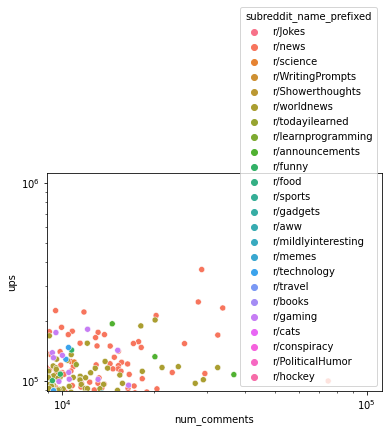

In [138]:
# Code for 2.3.5 here
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='num_comments', y ='ups' , data = part2_data , hue = 'subreddit_name_prefixed')
plt.xscale('log')
plt.yscale('log')

Compute the [Pearson correlation](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html#pandas.Series.corr) between ```ups``` and all other continuous variables (minus those you identified as not interesting in 2.3.1).

- **2.3.7** - Which of these has the strongest positive correlation with ```ups```?
- **2.3.8** - Which of these has the weakest positive correlation with ```ups```?

In [139]:
# Code for 2.3.7-8 here
part2_data_1 = part2_data.filter(['created_utc','total_awards_received','subreddit_subscribers','gilded','num_comments','num_crossposts','ups'], axis=1)
corr_up = part2_data_1.corr( method='pearson')
corr_up['ups']

created_utc              0.165471
total_awards_received    0.388154
subreddit_subscribers    0.410248
gilded                   0.228103
num_comments             0.330700
num_crossposts           0.537982
ups                      1.000000
Name: ups, dtype: float64

# Part 3 - Linear Regression

OK! We've got a decent handle on our data, and we're ready to do some learning. 

We're going to use a linear regression model to predict the number of upvotes.

## Part 3.1 - Regression to predict ```ups```

You will need to write code that does the following:

1. Recreates (if you did not already store it in your dataset) a variable for the year a post was sent in. Now, create a column ```year```, which. Then, subsets your data to only posts from 2015-2021 (inclusive).

2. Creates a feature matrix, ```X```, that contains features for the following variables:
- ```total_awards_received```
- ```gilded```
- ```num_comments```
- ```num_crossposts```
- ```year```
- ```is_self```
- ```is_video```
- ```locked```
- ```over_18```
- ```subreddit_name_prefixed```

3. Creates an outcome variable, ```y```, that is **the logarithm of** ```ups +1```.
4. Splits the data into train and test (80% training, 20% testing) using the relevant ```sklearn``` function. **We have written this line of code for you below, please do not change the random state!**
5. Trains a linear regression model on the training data
6. Evaluates the model you have trained on the test set, using ```RMSE``` as an error metric. **You should calculate this error using ONLY ```pandas``` and/or ```numpy```, not ```sklearn```.**
7. Prints the error

A few useful hints:
- You cannot use ```subreddit_name_prefixed``` as is, you have to transform it somehow. We have suggested a tool to do so below (the ```OneHotEncoder```)
- You also need to transform any boolean variables to 0/1 encodings


In [155]:
# Lets just reload the data in to make sure we're all starting fresh!
from datetime import datetime
import pandas as pd
part3_data = pd.read_csv("part2_data.csv")
part3_data['year'] = part3_data.created_utc.apply(lambda x : datetime.fromtimestamp(x).year)
part3_data=part3_data[(part3_data.year>=2015) & (part3_data.year<=2020)]

In [156]:
## NOTE: Typically we would not rescale a time variable, but it's fine for this assignment.
CONTINUOUS_VARS = ["total_awards_received", "gilded", "num_comments", "num_crossposts","created_utc"]
log_cont_vars=["total_awards_received", "gilded", "num_comments", "num_crossposts"]
BINARY_VARS = ["is_self", "is_video", "locked", "over_18"]


for var in BINARY_VARS:
    # Write your code here to make sure the boolean variables are formatted as integers, as is required by sklearn
    part3_data[var].replace({False:0,True:1},inplace=True)
part5=part3_data.copy()
part7=part3_data.copy()

In [157]:
from numpy.core.numeric import ones_like
from sklearn.preprocessing import OneHotEncoder

def onehot_encode_var(data, varname):
    # This function should take in a variable name in part3_data and return a onehot encoded matrix for that variable
    
    # Here's a starting point!
    encoder = OneHotEncoder(drop='first')
    # Use the encoder
    encoder.fit_transform(data[[varname]])
    onehot_encoded_variable=pd.DataFrame(encoder.transform(data[[varname]]).toarray())
    # return the onehot encoded variable
    return onehot_encoded_variable, encoder.categories_[0][1:]

In [158]:
# OK, now we're going to write our code to run the model!
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# First, rescale the continuous variables
continuous_rescaled_X = pd.DataFrame(StandardScaler().fit_transform(part3_data[CONTINUOUS_VARS].values))
continuous_rescaled_X.columns=CONTINUOUS_VARS
continuous_rescaled_X.index=part3_data.index
part3_data.drop(columns=CONTINUOUS_VARS,inplace=True)
part3_data=part3_data.join(continuous_rescaled_X,how='outer')

# Now, we can use our function above to get the onehotencoding for the subreddits ... go ahead!
enc_df,enc_cat=onehot_encode_var(part3_data,'subreddit_name_prefixed')
enc_df.columns=enc_cat
enc_df.index=part3_data.index
part3_data=part3_data.join(enc_df,how='outer')
part3_data.drop(columns=['subreddit_name_prefixed'],inplace=True)
matrix_heading=['total_awards_received','gilded','num_comments','num_crossposts','year','is_self','is_video','locked','over_18']
matrix_heading.extend(enc_cat)

# Now you can combine all of your features into a single feature matrix. Call it X
X= part3_data[matrix_heading]

#And create your outcome variable, call it y
y=np.log(part3_data['ups']+1) #outcome variable
y_notlog=part3_data['ups']
# Don't change this line!
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_notlog, 
                                                    test_size=0.2, 
                                                    random_state=1)

# fit a linear regression model, with an intercept
Linear_reg=LinearRegression(fit_intercept=True).fit(X_train,y_train)
print("Accuracy: ",Linear_reg.score(X_test,y_test))

# Compute RMSE
y_pred=Linear_reg.predict(X_test)
df_matrix=pd.DataFrame({'y_pred':y_pred,'y_test':y_test})
RMSE=((df_matrix.y_pred - df_matrix.y_test)**2).mean() ** 0.5
print("RMSE: ",RMSE)

Accuracy:  0.8905787013606777
RMSE:  0.3909503434799003


### Questions to check understanding

- **3.1.1** - Report your error on the test data, in RMSE. State what this metric means for the expected error in terms of the number of upvotes (not log upvotes!) you should expect to be off on any given prediction

Also, a few questions to target your understanding of how we set up the model:
- **3.1.2** - What did the whole one-hot encoding thing on ```subreddit_name_prefixed``` actually do? 
- **3.1.3** - What does the argument ```drop = "first"``` do for us when we are doing that to ```subreddit_name_prefixed```?
- **3.1.3** - Why did we need to add one to the outcome variable before using ```log```?
- **3.1.4** - What does the ```StandardScaler``` do? Why do we want to do that?


OK. Having looked at our RMSE, we should now realize that we have to be careful about assuming that this one statistic is actually a good estimate of how far we're going to be off on any prediction, selected at random. To see this, let's do the following:
- **3.1.5** - Provide a scatterplot that compares the true values in ```y_test``` to the absolute value of the difference between ```y_test``` and your predictions. **The axes should be on the original scale** (i.e. not the log scale you're predicting on.
- **3.1.6** - What does this plot suggest about how well your model fits the data as the true number of upvotes changes? 


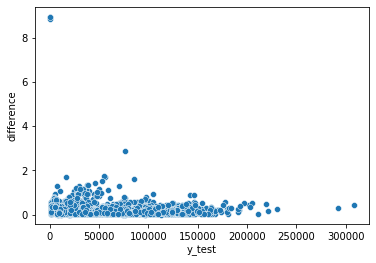

In [165]:
# Code for 3.1.5 here
import seaborn as sns
import matplotlib.pyplot as plt
y_pred1=Linear_reg.predict(X_test1)
part4=pd.DataFrame({'y_test':y_test1,'difference':abs(y_test-y_pred)})
sns.scatterplot(x='y_test', y ='difference' , data = part4)

One final thing we are going to play with in 3.1. Logging the dependent variable is useful for a few reasons we have or will discuss in class (depending on when you're reading this). But it's also sometimes useful to log *independent* variables as well. Below, redo the same analysis as above, but after logging the non-temporal continuous variables (i.e. all the continuous variables except ```created_utc```). Use these as predictors instead of the original continuous variables. **Note: Perform the logging before you rescale the variables. Also, you should add 1 as we did for the dependent variable above**.

- **3.1.7** - What is the new RMSE with the logged independent variables?
- **3.1.8** - How did this compare to the old RMSE? Why do you think that is? Hint: It may help to re-plot the same figure as you did in 3.1.5, but with the new model, in order to answer this question.


In [160]:
# Code for 3.1.7 here
part5_1=part5[log_cont_vars]
part5_1=np.log(part5_1[log_cont_vars]+1)
part5_1.index=part5.index
part5.drop(columns=log_cont_vars,inplace=True)
part5=part5.join(part5_1,how='outer')
# part5.head()

continuous_rescaled_X1 = pd.DataFrame(StandardScaler().fit_transform(part5[log_cont_vars].values))
continuous_rescaled_X1.columns=log_cont_vars
continuous_rescaled_X1.index=part5.index
part5.drop(columns=log_cont_vars,inplace=True)
part5=part5.join(continuous_rescaled_X1,how='outer')

enc_df,enc_cat=onehot_encode_var(part5,'subreddit_name_prefixed')
enc_df.columns=enc_cat
enc_df.index=part5.index
part5=part5.join(enc_df,how='outer')
part5.drop(columns=['subreddit_name_prefixed'],inplace=True)
matrix_heading=['total_awards_received','gilded','num_comments','num_crossposts','year','is_self','is_video','locked','over_18']
matrix_heading.extend(enc_cat)


# Now you can combine all of your features into a single feature matrix. Call it X
X= part5[matrix_heading]

#And create your outcome variable, call it y
y=np.log(part5['ups']+1) #outcome variable
y_notlog=part5['ups']

# Don't change this line!
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_notlog, 
                                                    test_size=0.2, 
                                                    random_state=1)

# fit a linear regression model, with an intercept
Linear_reg=LinearRegression(fit_intercept=True).fit(X_train,y_train)
print("Accuracy: ",Linear_reg.score(X_test,y_test))

y_pred=Linear_reg.predict(X_test)
df_matrix=pd.DataFrame({'y_pred':y_pred,'y_test':y_test})
RMSE=((df_matrix.y_pred - df_matrix.y_test)**2).mean() ** 0.5
print("RMSE: ",RMSE)

Accuracy:  0.9026904532913619
RMSE:  0.36867899197343285


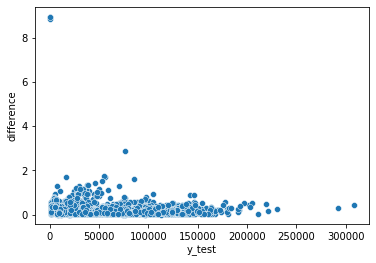

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
y_pred1=Linear_reg.predict(X_test1)
part6=pd.DataFrame({'y_test':y_test1,'difference':abs(y_test-y_pred)})
sns.scatterplot(x='y_test', y ='difference' , data = part6)

## Part 3.2 - Exploration of regression coefficients

Now, let's look at the effects of our variables for this last model (with the logarithms of the independent variables). Carefully re-combine your features with their labels (*hint, ```encoder.categories_``` will be your friend, and remember, we dropped the first category!*)

- **3.2.1** - What is the strongest positive predictor of upvotes? How many more log(upvotes+1) does a one standard deviation increase in the feature correspond to?
- **3.2.2** - What is the strongest negative predictor of upvotes? How many fewer log(upvotes+1) does a one standard deviation increase in the feature correspond to?

In [162]:
# Add your code for 3.2 here
import statsmodels.api as sm
coeff_df = pd.DataFrame(Linear_reg.coef_, X.columns, columns=['Coefficients'])
#print(coeff_df)

mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values=pd.DataFrame(p_values)
# print(p_values)
final = coeff_df.join(p_values,how='outer')
final.sort_values(['Coefficients'])

,Coefficients,P>|t|
r/learnprogramming,-2.912267,0.000000e+00
r/announcements,-1.793661,0.000000e+00
r/conspiracy,-1.555587,0.000000e+00
r/travel,-1.523713,0.000000e+00
r/hockey,-1.477988,0.000000e+00
r/gadgets,-1.411579,0.000000e+00
r/books,-1.016009,0.000000e+00
r/WritingPrompts,-0.961976,0.000000e+00
r/cats,-0.743248,1.134326e-178
r/food,-0.512502,9.507739e-119


# Part 3.3 - 574 Only - Attempting to Improve Your Predictions 

In class, we talked about a few things we might do to improve our model's predictions. These include adding interaction terms, including different functional forms of a feature, using a different model, etc. Here, we ask that you implement at least two of these, and then re-evaluate your model. We'll ask some of the teams with some of the more interesting/effective ideas here to come present their solutions to the class!

- **3.3.1** - Describe at least two changes you made -- at least one to the feature set, and at least one different model -- to try to improve prediction.  Explain *why* you think that these changes make sense, given the Exploratory analyeses above, or any other exploratory analysis you choose to do.
- **3.3.2** - By how much did your RMSE improve? Which change that you made improved it the most? How do you know?

In [ ]:
# Add your code for 3.3.1 here
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler

part7_1=part7[log_cont_vars]
part7_1=np.log(part7_1[log_cont_vars]+1)
part7_1.index=part7.index
part7.drop(columns=log_cont_vars,inplace=True)
part7=part7.join(part7_1,how='outer')
# part7.head()

continuous_rescaled_X2 = pd.DataFrame(RobustScaler().fit_transform(part7[log_cont_vars].values))
continuous_rescaled_X2.columns=log_cont_vars
continuous_rescaled_X2.index=part7.index
part7.drop(columns=log_cont_vars,inplace=True)
part7=part7.join(continuous_rescaled_X2,how='outer')

enc_df,enc_cat=onehot_encode_var(part7,'subreddit_name_prefixed')
enc_df.columns=enc_cat
enc_df.index=part7.index
part7=part7.join(enc_df,how='outer')
part7.drop(columns=['subreddit_name_prefixed'],inplace=True)
matrix_heading=['total_awards_received','gilded','num_comments','num_crossposts','year','is_self','is_video','locked','over_18']
matrix_heading.extend(enc_cat)

# enc=LabelEncoder()
# enc.fit(part7['subreddit_name_prefixed'])
# out=enc.transform(part7['subreddit_name_prefixed'])
# part7['subreddit_name_prefixed']=out

# matrix_heading=['total_awards_received','gilded','num_comments','num_crossposts','year','is_self','is_video','locked','over_18','subreddit_name_prefixed']

In [ ]:
# Now you can combine all of your features into a single feature matrix. Call it X
X= part7[matrix_heading]

#And create your outcome variable, call it y
y=np.log(part7['ups']+1) #outcome variable
y_notlog=part7['ups']

# Don't change this line!
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_notlog, 
                                                    test_size=0.2, 
                                                    random_state=1)

# fit a linear regression model, with an intercept
degree = 3
alpha = 1e-3
estimate = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
estimate.fit(X_train, y_train)
# Linear_reg=LinearRegression(fit_intercept=True).fit(X_train,y_train)
# print("Accuracy: ",Linear_reg.score(X_test,y_test))
print(estimate.score(X_test,y_test))

y_pred=estimate.predict(X_test)
df_matrix=pd.DataFrame({'y_pred':y_pred,'y_test':y_test})
RMSE=((df_matrix.y_pred - df_matrix.y_test)**2).mean() ** 0.5
print("RMSE: ",RMSE)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.107e+02, tolerance: 1.887e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.9112248535312591
RMSE:  0.3521408152856475
